In [1]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn import decomposition
from scipy import linalg
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
np.set_printoptions(suppress=True)

In [3]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=remove)

In [4]:
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=remove)

In [5]:
newsgroups_train.filenames.shape, newsgroups_test.filenames.shape

((2034,), (1353,))

In [6]:
newsgroups_train.filenames.shape[0]

2034

In [7]:
random_index = np.random.randint(0, newsgroups_train.filenames.shape[0]-1, 3)
print(random_index)

print("\n\n#================================#\n\n".join(np.array(newsgroups_train.data)[random_index]))

[1482 1402 1765]


	Up to that point I thought you were talking about the
Rosicrucian Order... :-)  [No offense intended!]

#================================#


     Now doesn't this sound a lot like the "colorful (or otherwise) story 
     from antiquity that somehow tries to (or does) explain natural pheno-
     mena"?  I think I hear what you're saying, but I'm not convinced that
     I know what you mean.  The possibility exists that what _looks_ like
     "myth" on the surface may be after all much more than "just" a story.
     
      

     * * * * * * * * * * * * * * * * * * * * *

#================================#


Off the top of my head, I might try:

Given: p_1, p_2, p_3, p_4

Find:  p_c (center of sphere determined by p_1, ..., p_4), 
       dist(p_c, p_i) (radius)

p_c is the same distance from our four points, so
dist(p_c,p_1) = dist(p_c,p_2) = dist(p_c,p_3) = dist(p_c,p_4) 

Of course, we can square the whole thing to get rid of square roots:
distsq(p_c,p_1) = distsq(p

In [8]:
np.array(newsgroups_train.target_names)[newsgroups_train.target[random_index]]

array(['talk.religion.misc', 'talk.religion.misc', 'comp.graphics'],
      dtype='<U18')

In [9]:
newsgroups_train.target[random_index]

array([3, 3, 1])

In [10]:
num_topics, num_top_words = 6, 8

# Stop words

In [11]:
from sklearn.feature_extraction import stop_words
sorted(list(stop_words.ENGLISH_STOP_WORDS))[:20]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

# Stemming and Lemmatization

In [12]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/rprilepskiy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
from nltk import stem

In [14]:
wnl = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

In [15]:
word_list = ['feet', 'foot', 'foots', 'footing']

In [16]:
[wnl.lemmatize(word) for word in word_list]

['foot', 'foot', 'foot', 'footing']

In [17]:
[porter.stem(word) for word in word_list]

['feet', 'foot', 'foot', 'foot']

## Small tasks

In [18]:
def get_lem_stem(w_list):
    w_list_lemmas = [wnl.lemmatize(word) for word in w_list]
    w_list_stemmed = [porter.stem(word) for word in w_list]
    
    print("Word list: {}".format(w_list))
    print("Lemmas list: {}".format(w_list_lemmas))
    print("Stemmed list: {}".format(w_list_stemmed))
    
    return w_list_lemmas, w_list_stemmed

In [19]:
t1 = ["fly", "flies", "flying"]
t2 = ["organize", "organizes", "organizing"]
t3 = ["universe", "university"]

t = [t1, t2, t3]

In [20]:
for w_list in t:
    _, _ = get_lem_stem(w_list)
    print()

Word list: ['fly', 'flies', 'flying']
Lemmas list: ['fly', 'fly', 'flying']
Stemmed list: ['fli', 'fli', 'fli']

Word list: ['organize', 'organizes', 'organizing']
Lemmas list: ['organize', 'organizes', 'organizing']
Stemmed list: ['organ', 'organ', 'organ']

Word list: ['universe', 'university']
Lemmas list: ['universe', 'university']
Stemmed list: ['univers', 'univers']



# Spacy

In [21]:
#!pip install spacy

In [22]:
#!python -m spacy download en_core_web_sm

In [23]:
import spacy

from spacy.lemmatizer import Lemmatizer
# from spacy.language import Lookups
from spacy.lookups import Lookups

In [24]:
nlp = spacy.load("en_core_web_sm")

In [25]:
lookups = Lookups() #nlp.vocab.lookups.tables

In [26]:
# nlp.vocab.lookups.get_table('lemma_lookup')

In [27]:
lemmatizer = Lemmatizer(lookups)

In [28]:
[lemmatizer.lookup(word) for word in word_list]

['feet', 'foot', 'foots', 'footing']

In [29]:
sorted(list(nlp.Defaults.stop_words))[:20]

["'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also']

# stop words in spacy but not in sklearn

In [30]:
set(nlp.Defaults.stop_words) - set(stop_words.ENGLISH_STOP_WORDS)

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'ca',
 'did',
 'does',
 'doing',
 'just',
 'make',
 "n't",
 'n‘t',
 'n’t',
 'quite',
 'really',
 'regarding',
 'say',
 'unless',
 'used',
 'using',
 'various',
 '‘d',
 '‘ll',
 '‘m',
 '‘re',
 '‘s',
 '‘ve',
 '’d',
 '’ll',
 '’m',
 '’re',
 '’s',
 '’ve'}

# stop words in sklearn but not in spacy

In [31]:
set(stop_words.ENGLISH_STOP_WORDS) - set(nlp.Defaults.stop_words)

{'amoungst',
 'bill',
 'cant',
 'co',
 'con',
 'couldnt',
 'cry',
 'de',
 'describe',
 'detail',
 'eg',
 'etc',
 'fill',
 'find',
 'fire',
 'found',
 'hasnt',
 'ie',
 'inc',
 'interest',
 'ltd',
 'mill',
 'sincere',
 'system',
 'thick',
 'thin',
 'un'}

# Data Processing

In [32]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [33]:
vectorizer = CountVectorizer(stop_words='english')

In [34]:
vectors = vectorizer.fit_transform(newsgroups_train.data).todense()
vectors.shape

(2034, 26576)

In [35]:
print(len(newsgroups_train.data), vectors.shape)

2034 (2034, 26576)


In [36]:
vocab = np.array(vectorizer.get_feature_names())
vocab.shape

(26576,)

In [37]:
vocab[12000:12020]

array(['herb', 'herbert', 'herbs', 'hercules', 'herd',
       'here__________________________________', 'hereditary', 'heresies',
       'heresy', 'heretic', 'heretical', 'heretics', 'heritage', 'herman',
       'hermes', 'hermetic', 'hermida', 'hermippus', 'hermite',
       'hermodorus'], dtype='<U80')

# SVD

In [38]:
%time U, s, Vh = linalg.svd(vectors, full_matrices=False)

CPU times: user 34.4 s, sys: 609 ms, total: 35 s
Wall time: 6.21 s


In [39]:
print(U.shape, s.shape, Vh.shape)

(2034, 2034) (2034,) (2034, 26576)


In [40]:
print(vectors.shape)

(2034, 26576)


In [41]:
(U @ np.diag(s) @ Vh).shape

(2034, 26576)

In [42]:
reconstructed_vectors = U @ np.diag(s) @ Vh

In [43]:
np.linalg.norm(reconstructed_vectors - vectors)

2.7492516718981167e-12

# Check orthonormality

In [44]:
np.allclose(U.T @ U, np.eye(U.shape[0]))

True

In [45]:
np.allclose(Vh @ Vh.T, np.eye(Vh.shape[0]))

True

# Singular values

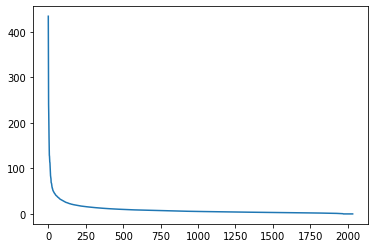

In [46]:
plt.plot(s);

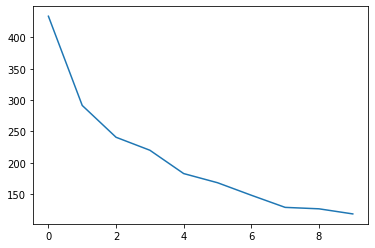

In [47]:
plt.plot(s[:10]);

# Show top words 

In [48]:
num_top_words = 15 

def show_topics(a):
    top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-num_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]

In [49]:
show_topics(Vh[:10])

['ditto critus propagandist surname galacticentric kindergarten surreal imaginative salvadorans ahhh autotheism yeager 1883 1909 stunningly',
 'jpeg gif file color quality image jfif format bit version programs viewer quicktime compression free',
 'graphics edu pub mail 128 3d ray ftp send image amiga objects server archie rayshade',
 'jesus god matthew people atheists atheism does graphics religious said christian religion believe bible prophecy',
 'image data processing analysis software available tools display tool user sun using fax include provides',
 'god atheists atheism religious believe religion argument true atheist example belief universe exist fallacy don',
 'space nasa lunar mars probe moon missions probes surface earth planetary orbit mission venus available',
 'image probe surface lunar mars probes moon orbit mariner mission processing venus missions earth images',
 'argument fallacy conclusion example true ad argumentum premises false valid form inference occurs premise

# Non-negative Matrix Factorization (NMF)

## NMF from sklearn

In [59]:
m,n = vectors.shape
d = 5 # num topics

In [60]:
clf = decomposition.NMF(n_components=d, random_state=1)

In [61]:
W1 = clf.fit_transform(vectors)
H1 = clf.components_

In [62]:
show_topics(H1)

['jpeg image gif file color images format quality version files free bit use programs jfif',
 'edu graphics pub mail 128 ray ftp send 3d com server objects data amiga files',
 'space launch satellite nasa commercial satellites year market data earth mission lunar orbit program shuttle',
 'jesus god people matthew atheists does atheism said just believe religious religion christian say true',
 'image data available software processing ftp edu analysis images display package user tools program sun']

## TF-IDF

In [63]:
vectorizer_tfidf = TfidfVectorizer(stop_words='english')
vectors_tfidf = vectorizer_tfidf.fit_transform(newsgroups_train.data) # (documents, vocab)

In [64]:
newsgroups_train.data[10:20]

["a\n\nWhat about positional uncertainties in S-L 1993e?   I assume we know where\nand what Galileo is doing within a few meters.   But without the\nHGA,  don't we have to have some pretty good ideas, of where to look\nbefore imaging?  If the HGA was working,  they could slew around\nin near real time (Less speed of light delay).  But when they were\nimaging toutatis????  didn't someone have to get lucky on a guess to\nfind the first images?   \n\nAlso, I imagine S-L 1993e will be mostly a visual image.  so how will\nthat affect the other imaging missions.  with the LGA,  there is a real\ntight allocation of bandwidth.   It may be premature to hope for answers,\nbut I thought i'd throw it on the floor.",
 "I would like to program Tseng ET4000 to nonstandard 1024x768 mode by\nswitching to standard 1024x768 mode using BIOS and than changing some\ntiming details (0x3D4 registers 0x00-0x1F) but I don't know how to\nselect 36 MHz pixel clock I need. The BIOS function selects 40 MHz.\n\nIs t

In [65]:
W1 = clf.fit_transform(vectors)
H1 = clf.components_
show_topics(H1)

['jpeg image gif file color images format quality version files free bit use programs jfif',
 'edu graphics pub mail 128 ray ftp send 3d com server objects data amiga files',
 'space launch satellite nasa commercial satellites year market data earth mission lunar orbit program shuttle',
 'jesus god people matthew atheists does atheism said just believe religious religion christian say true',
 'image data available software processing ftp edu analysis images display package user tools program sun']

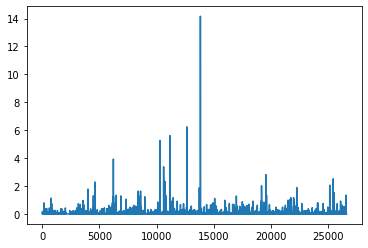

In [66]:
plt.plot(clf.components_[0]);

In [67]:
clf.reconstruction_err_

683.3993486215859